# Regression of Techincal Documentation Data 

### Linear Regression 
We will perform basic linear regression on the features provided in the csv file. The target variable is the average time spent on page. First import the proper modules. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 

Then, we read the csv to store it in a pandas dataframe. We remove the first row, since this is not data for a specific documentation URL. We also store the average time spend on page in a separate numpy array. 

In [2]:
# Get input data
df = pd.read_csv("docs_page_short_version_loast 13months.csv")
del df[df.columns[0]]
del df["Average Time Spent on Page"]
X = df.tail(-1).to_numpy()

# Get output data
Y = pd.read_csv("docs_page_short_version_loast 13months.csv")["Average Time Spent on Page"]
Y = Y.tail(-1).to_numpy() 

print(X.shape, Y.shape)

(400, 4) (400,)


Then we initialize the linear regression model, fit it, and print out the coefficients, along with its score indicating how good of a fit it is. It turns out that it is not a very good fit. 

In [36]:
model = LinearRegression().fit(X, Y)
print(model.coef_, model.intercept_)
print(model.score(X, Y))

[-2.14745729e-04  3.19660358e-04 -1.01107640e-04  2.46037705e+00] 0.837526645814242
0.2872466075454523


We can also visualize the dataset by plotting it against one variable. 

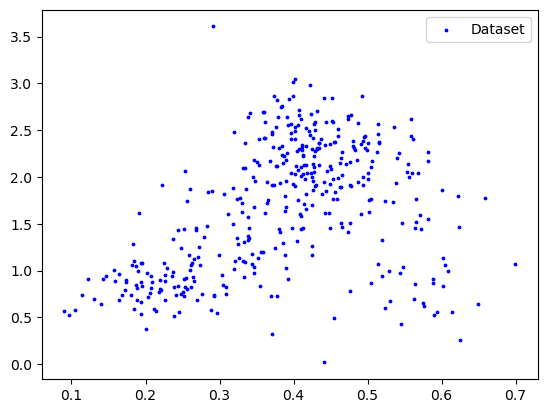

In [38]:
# plot dataset 
dataX = X[:, -1].reshape(-1) 
dataY = Y.reshape(-1) 
plt.scatter(dataX, dataY, c="b", s=3, label="Dataset")
plt.legend() 
plt.show() 

### Polynomial Regression + Regularization

Since the linear fit was not good, we use polynomial regression with varying degrees. We cannot go too high due to the explosive growth in the model parameters. Perhaps we should do $M = 1, \ldots, 10$

In [16]:
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv("docs_page_short_version_loast 13months.csv")
del df[df.columns[0]]
del df["Average Time Spent on Page"]
X = df.tail(-1).to_numpy()

X_poly = PolynomialFeatures(degree=3).fit_transform(X) 
model = LinearRegression().fit(X_poly, Y) 
model.score(X_poly, Y)

0.6074359285145761